## Data Science

#### Oscar Hernández Terán. Geophysical engineer 

This workbook contains exercises from Pythor for Exploratory Data Analysis. It runs on python3, specifically version 3.9.7.

In [1]:
# We import the library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Exercise 1-5.
df = pd.read_csv('../DataBase/Data4.csv')
df

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QC,Crops,9,Argentina,5419,Yield,515,Apples,2016,2016,hg/ha,223912,Fc,Calculated data
1,QC,Crops,9,Argentina,5419,Yield,515,Apples,2017,2017,hg/ha,235386,Fc,Calculated data
2,QC,Crops,9,Argentina,5419,Yield,515,Apples,2018,2018,hg/ha,213072,Fc,Calculated data
3,QC,Crops,9,Argentina,5510,Production,515,Apples,2016,2016,tonnes,458908,NaN,Official data
4,QC,Crops,9,Argentina,5510,Production,515,Apples,2017,2017,tonnes,458908,NaN,Official data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,QC,Crops,231,United States of America,5419,Yield,388,Tomatoes,2017,2017,hg/ha,886625,Fc,Calculated data
62,QC,Crops,231,United States of America,5419,Yield,388,Tomatoes,2018,2018,hg/ha,968079,Fc,Calculated data
63,QC,Crops,231,United States of America,5510,Production,388,Tomatoes,2016,2016,tonnes,12877049,NaN,Official data
64,QC,Crops,231,United States of America,5510,Production,388,Tomatoes,2017,2017,tonnes,11141862,NaN,Official data


In [3]:
df.head(3)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QC,Crops,9,Argentina,5419,Yield,515,Apples,2016,2016,hg/ha,223912,Fc,Calculated data
1,QC,Crops,9,Argentina,5419,Yield,515,Apples,2017,2017,hg/ha,235386,Fc,Calculated data
2,QC,Crops,9,Argentina,5419,Yield,515,Apples,2018,2018,hg/ha,213072,Fc,Calculated data


In [4]:
df.tail(2)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
64,QC,Crops,231,United States of America,5510,Production,388,Tomatoes,2017,2017,tonnes,11141862,NaN,Official data
65,QC,Crops,231,United States of America,5510,Production,388,Tomatoes,2018,2018,tonnes,12612139,NaN,Official data


In [5]:
print(df.index)
print()
print(df.columns)
print()
print(df.shape)
print()
print(df.dtypes)

RangeIndex(start=0, stop=66, step=1)

Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value', 'Flag',
       'Flag Description'],
      dtype='object')

(66, 14)

Domain Code         object
Domain              object
Area Code            int64
Area                object
Element Code         int64
Element             object
Item Code            int64
Item                object
Year Code            int64
Year                 int64
Unit                object
Value                int64
Flag                object
Flag Description    object
dtype: object


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Domain Code       66 non-null     object
 1   Domain            66 non-null     object
 2   Area Code         66 non-null     int64 
 3   Area              66 non-null     object
 4   Element Code      66 non-null     int64 
 5   Element           66 non-null     object
 6   Item Code         66 non-null     int64 
 7   Item              66 non-null     object
 8   Year Code         66 non-null     int64 
 9   Year              66 non-null     int64 
 10  Unit              66 non-null     object
 11  Value             66 non-null     int64 
 12  Flag              43 non-null     object
 13  Flag Description  66 non-null     object
dtypes: int64(6), object(8)
memory usage: 7.3+ KB
None


In [7]:
print(df['Area'].unique())
print()
print(df['Element'].unique())
print()
print(df['Item'].unique())

['Argentina' 'Brazil' 'United States of America']

['Yield' 'Production']

['Apples' 'Bananas' 'Cherries' 'Tomatoes']


In [8]:
df = df.drop(columns=['Domain Code', 'Domain', 'Area Code', 
                      'Element Code', 'Item Code', 'Year Code', 'Flag', 'Flag Description'], axis=1)
df

,Area,Element,Item,Year,Unit,Value
0,Argentina,Yield,Apples,2016,hg/ha,223912
1,Argentina,Yield,Apples,2017,hg/ha,235386
2,Argentina,Yield,Apples,2018,hg/ha,213072
3,Argentina,Production,Apples,2016,tonnes,458908
4,Argentina,Production,Apples,2017,tonnes,458908
...,...,...,...,...,...,...
61,United States of America,Yield,Tomatoes,2017,hg/ha,886625
62,United States of America,Yield,Tomatoes,2018,hg/ha,968079
63,United States of America,Production,Tomatoes,2016,tonnes,12877049
64,United States of America,Production,Tomatoes,2017,tonnes,11141862


In [9]:
def Count(country):
    if country == 'Argentina':
        return 'AR'
    elif country == 'United States of America':
        return 'USA'
    else:
        return 'BR'
    
df['Area'] = df['Area'].apply(Count)

In [10]:
df['Value'].astype(float)

0       223912.0
1       235386.0
2       213072.0
3       458908.0
4       458908.0
         ...    
61      886625.0
62      968079.0
63    12877049.0
64    11141862.0
65    12612139.0
Name: Value, Length: 66, dtype: float64

In [11]:
df['Country / Commodity'] = df['Area']+' '+ df['Item']

In [12]:
df.head()

,Area,Element,Item,Year,Unit,Value,Country / Commodity
0,AR,Yield,Apples,2016,hg/ha,223912,AR Apples
1,AR,Yield,Apples,2017,hg/ha,235386,AR Apples
2,AR,Yield,Apples,2018,hg/ha,213072,AR Apples
3,AR,Production,Apples,2016,tonnes,458908,AR Apples
4,AR,Production,Apples,2017,tonnes,458908,AR Apples


In [13]:
production = df.groupby('Element').get_group('Production')
yield_ = df.groupby('Element').get_group('Yield')

In [14]:
#production = production.pivot(index = 'Year', columns = 'Country / Commodity', values = 'Value')
#yield_ = yield_.pivot(index = 'Year', columns = 'Country / Commodity', values = 'Value')

In [15]:
# Part 2
df = pd.read_csv('../DataBase/Data7.csv')
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [16]:
print(df.columns)
print()
print(df.index)
print()
print(df.shape)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

RangeIndex(start=0, stop=21613, step=1)

(21613, 21)


In [17]:
print(df.info())
print()
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [18]:
df.drop(columns=['id', 'date', 'zipcode', 'lat', 'long'], inplace=True)

In [19]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [20]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


In [21]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,0.713202,0.119248


<AxesSubplot:>

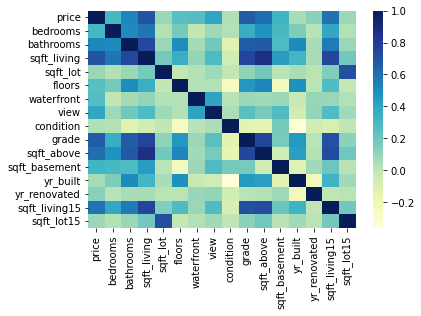

In [22]:
df.cov()
sns.heatmap(df.corr(), cmap="YlGnBu")

In [23]:
#%matplotlib inline
#sns.pairplot(data=df)
#plt.show()

In [24]:
x = df['price']
y = df.drop('price', axis=1)

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 33)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

In [26]:
# Part 3
df = pd.read_csv('../DataBase/Data8.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [27]:
df.rename(columns= lambda column:'_'.join(column.title().split()), inplace=True)
df.head()

,Gender,Race/Ethnicity,Parental_Level_Of_Education,Lunch,Test_Preparation_Course,Math_Score,Reading_Score,Writing_Score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [28]:
for col in df.columns:
    print(df[col].value_counts())

female    518
male      482
Name: Gender, dtype: int64
group C    319
group D    262
group B    190
group E    140
group A     89
Name: Race/Ethnicity, dtype: int64
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: Parental_Level_Of_Education, dtype: int64
standard        645
free/reduced    355
Name: Lunch, dtype: int64
none         642
completed    358
Name: Test_Preparation_Course, dtype: int64
65    36
62    35
69    32
59    32
61    27
      ..
24     1
26     1
28     1
33     1
0      1
Name: Math_Score, Length: 81, dtype: int64
72    34
74    33
64    32
67    30
73    30
      ..
26     1
32     1
40     1
23     1
17     1
Name: Reading_Score, Length: 72, dtype: int64
74    35
70    33
68    31
73    28
80    27
      ..
23     1
28     1
35     1
15     1
10     1
Name: Writing_Score, Length: 77, dtype: int64


In [29]:
name = df.columns[-3:].to_list()
name

['Math_Score', 'Reading_Score', 'Writing_Score']

In [30]:
print(df.isna().sum()/len(df)*100)

Gender                         0.0
Race/Ethnicity                 0.0
Parental_Level_Of_Education    0.0
Lunch                          0.0
Test_Preparation_Course        0.0
Math_Score                     0.0
Reading_Score                  0.0
Writing_Score                  0.0
dtype: float64


In [31]:
df.describe()

,Math_Score,Reading_Score,Writing_Score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [32]:
gender = df.groupby('Gender')
metrics = [np.mean, np.median, np.var, np.std]
gender[name].agg(metrics).T

Gender                    female        male
Math_Score    mean     63.633205   68.728216
              median   65.000000   69.000000
              var     239.985124  206.102695
              std      15.491453   14.356277
Reading_Score mean     72.608108   65.473029
              median   73.000000   66.000000
              var     206.733938  194.095945
              std      14.378245   13.931832
Writing_Score mean     72.467181   63.311203
              median   74.000000   64.000000
              var     220.369327  199.200248
              std      14.844842   14.113832

In [33]:
gender_preparation = (df.groupby(['Gender', 'Test_Preparation_Course'])
                      [name].agg(metrics)).T
gender_preparation

Gender                       female                    male            
Test_Preparation_Course   completed        none   completed        none
Math_Score    mean        67.195652   61.670659   72.339080   66.688312
              median      67.000000   62.000000   73.000000   67.000000
              var        202.901402  250.209527  202.260082  197.374847
              std         14.244346   15.818013   14.221817   14.049016
Reading_Score mean        77.375000   69.982036   70.212644   62.795455
              median      78.000000   71.000000   71.000000   63.000000
              var        161.175546  212.918595  186.827354  178.899393
              std         12.695493   14.591730   13.668480   13.375328
Writing_Score mean        78.793478   68.982036   69.793103   59.649351
              median      79.000000   70.000000   70.000000   60.000000
              var        149.836897  225.495172  168.800877  179.713778
              std         12.240788   15.016497   12.992339   13.405737

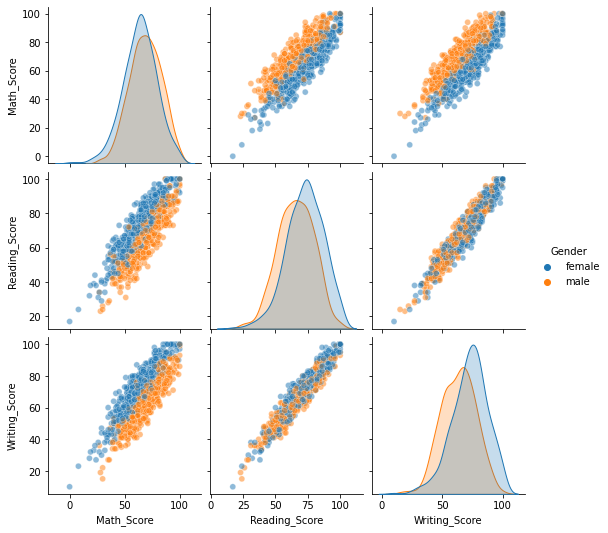

In [34]:
%matplotlib inline
sns.pairplot(df, hue = 'Gender', plot_kws = {'alpha':0.5});